In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt, Hannanum, Kkma, Komoran, Mecab
from wordcloud import WordCloud
from collections import Counter
import re

In [26]:
df = pd.read_csv('./data/namsan_reviews_cleaned.csv')

In [27]:
# 한글 추출
def text_cleaning(text) :
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [28]:
df['review_text'] = df['review_text'].apply(lambda x: text_cleaning(x))

In [29]:
review_corpus = ''.join(df['review_text'])

In [30]:
tagger = Okt()
review_nouns = tagger.nouns(review_corpus)

In [31]:
word_count = Counter(review_nouns)

In [32]:
word_count.most_common(10)

[('산책', 108),
 ('곳', 88),
 ('남산', 47),
 ('공원', 45),
 ('수', 38),
 ('서울', 30),
 ('것', 25),
 ('장소', 23),
 ('정원', 23),
 ('꽃', 23)]

In [33]:
for e in ['남산', '야외', '식물원', '곳', '수', '것', '아주', '매우', '정말', '등', '더']:
    word_count.pop(e)

In [34]:
word_count.most_common(10)

[('산책', 108),
 ('공원', 45),
 ('서울', 30),
 ('장소', 23),
 ('정원', 23),
 ('꽃', 23),
 ('자연', 20),
 ('도심', 19),
 ('힐링', 16),
 ('걷기', 16)]

In [35]:
import platform, os

def check_font_path():
    system_name = platform.system()
    if system_name == 'Darwin':
        font_path = '/Library/Fonts/Arial Unicode.ttf'
    elif system_name == 'Windows':
        font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
    elif system_name == 'Linux':
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    else:
        raise Exception('Unknown system name')
    if not os.path.isfile(font_path):
        raise Exception('File not found')
    return font_path

current_font_path = check_font_path()

In [42]:
wc = WordCloud(
    font_path=current_font_path,
    width=800,
    height=800,
    background_color='white',
)

In [45]:
wc.generate_from_frequencies(word_count)

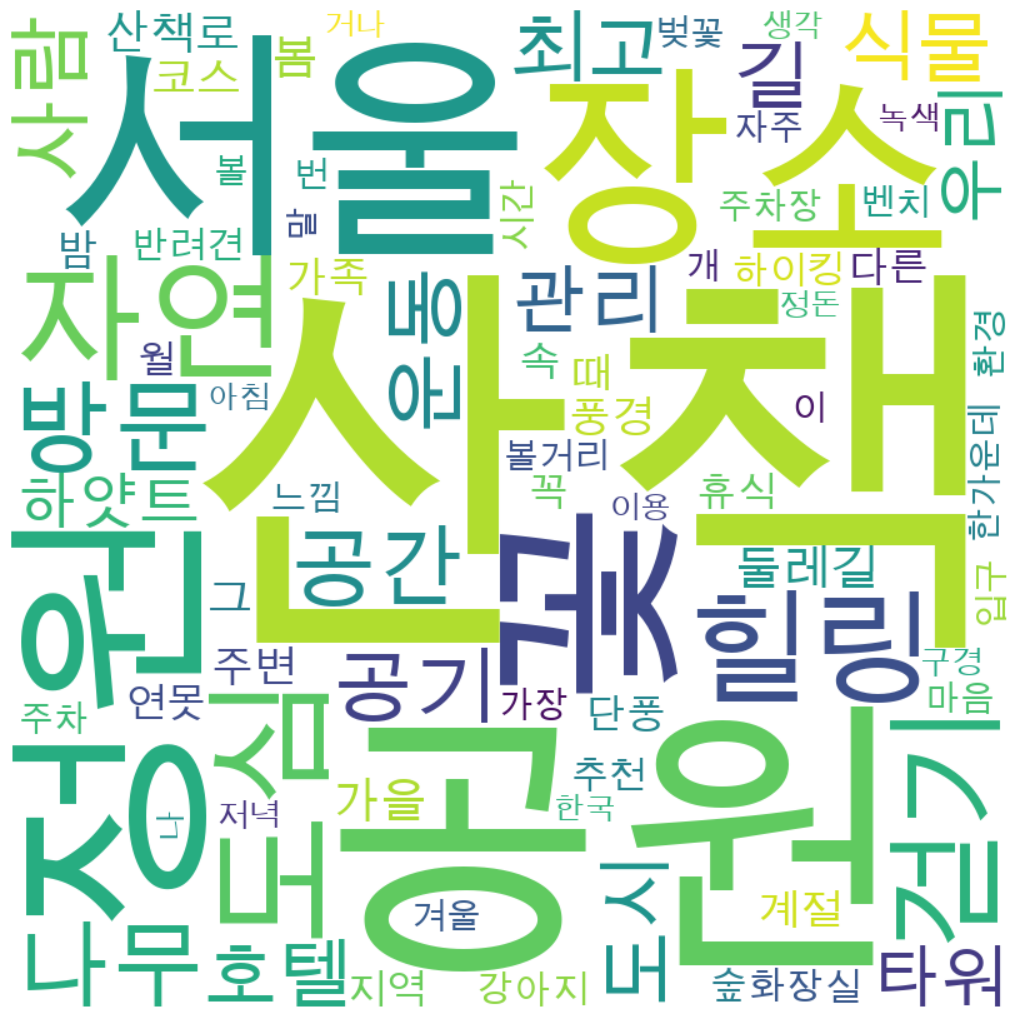

In [46]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('./result/namsan_wordcloud.png')
plt.show()